# Intalación de Paquetes de Python

In [ ]:
!pip install -q langchain_openai langchain_community langchainhub langchain langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install -q pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install -q tiktoken chromadb pypdf tavily-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.6 MB/s eta 0:00

# Conectamos el Colab con Nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/RAG

/content/drive/MyDrive/RAG


# Lectura de Archivos PDF

In [ ]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_openai import ChatOpenAI

In [ ]:
loader = PyPDFLoader('/content/drive/MyDrive/RAG/RAGdata/Dress_Code_Standards.pdf')
docs = loader.load()
docs

[Document(metadata={'producer': 'Skia/PDF m134 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'Dress Code Standards', 'source': '/content/drive/MyDrive/RAG/RAGdata/Dress_Code_Standards.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Dress  Code  Guidelines  for  Work  \n \n1.  Purpose  Taking  into  account  the  individuality  of  each  employee  according  to  the  nature  of  the  \nbusiness,\n \nemployees\n \nare\n \nexpected\n \nto\n \nwear\n \nwork\n \nattire\n \nthat\n \nreflects\n \nprofessionalism\n \nand\n \ndecorum.\n \n2.  Considerations  for  Dress  Selection  1.  Maintain  honor  and  dignity  as  professionals.  2.  Always  uphold  neat  and  clean  attire.  3.  Choose  attire  based  on  multiple  objective  criteria.  4.  Wear  clothing  that  does  not  offend  others  or  clients.  \n3.  Applicability  1.  All  employees.  2.  For  employees  working  with  client  companies,  follow  the  dress  code  of  the  respective

## Carga del Modelo para generar embeddings

In [ ]:
llm = ChatOpenAI(model="gpt-4-turbo", temperature=0)
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')

## Separar los documentos

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)
chunked_docs = text_splitter.split_documents(docs)
chunked_docs[:2]

[Document(metadata={'producer': 'Skia/PDF m134 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'Dress Code Standards', 'source': '/content/drive/MyDrive/RAG/RAGdata/Dress_Code_Standards.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Dress  Code  Guidelines  for  Work  \n \n1.  Purpose  Taking  into  account  the  individuality  of  each  employee  according  to  the  nature  of  the  \nbusiness,\n \nemployees\n \nare\n \nexpected\n \nto\n \nwear\n \nwork\n \nattire\n \nthat\n \nreflects\n \nprofessionalism\n \nand\n \ndecorum.'),
 Document(metadata={'producer': 'Skia/PDF m134 Google Docs Renderer', 'creator': 'PyPDF', 'creationdate': '', 'title': 'Dress Code Standards', 'source': '/content/drive/MyDrive/RAG/RAGdata/Dress_Code_Standards.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='and\n \ndecorum.\n \n2.  Considerations  for  Dress  Selection  1.  Maintain  honor  and  dignity  as  professionals.  2.  Always  uphold  

## Inicializamos base de datos vectorial

In [ ]:
vectorstore = Chroma.from_documents(documents=chunked_docs, collection_name="rag_pdf_db", embedding=openai_embed_model,)
retriever = vectorstore.as_retriever()
print(retriever)

tags=['Chroma', 'OpenAIEmbeddings'] vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x798d2fe090d0> search_kwargs={}


### Agent 1

In [ ]:
#Implement the Retrieval Grader Fig 6 Paper
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI
#Data model for LLM output format
class GradeDocuments(BaseModel):
  """A binary score for checking relevance of retrieved documents. """
  binary_score: str = Field(
      description="Rates whether the document is relevant to the question with a 'yes' or 'no' "
  )

#LLM for grading
llm = ChatOpenAI(model="gpt-4-turbo", temperature=0)
structured_llm_grader = llm.with_structured_output(GradeDocuments)
#Propmt template for grading
SYS_PROMPT = """ You are a professional evaluator who evaluates the relevance of searched  documents
                - We assign a relevance rating to documents if they contain keywords or semantics
                - Your rating should be 'yes' or 'no' indicating whether the article is  relevant
             """
grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", SYS_PROMPT),
        ("human", """Searched Documents: {document}
                     User Questions: {question} """),
    ]
)
doc_grader = (grade_prompt | structured_llm_grader)
print(doc_grader)

first=ChatPromptTemplate(input_variables=['document', 'question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template=" You are a professional evaluator who evaluates the relevance of searched  documents\n                - We assign a relevance rating to documents if they contain keywords or semantics\n                - Your rating should be 'yes' or 'no' indicating whether the article is  relevant\n             "), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['document', 'question'], input_types={}, partial_variables={}, template='Searched Documents: {document}\n                     User Questions: {question} '), additional_kwargs={})]) middle=[RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x798d27f166d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1360: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  

In [ ]:
query = "What are some considerations for dress selection for work?"
topk_docs = retriever.invoke(query)
for doc in topk_docs:
  print(doc.page_content)
  print("========================")
  print('GRADE:', doc_grader.invoke({"question": query, "document": doc.page_content}))
  print("========================")

Dress  Code  Guidelines  for  Work  
 
1.  Purpose  Taking  into  account  the  individuality  of  each  employee  according  to  the  nature  of  the  
business,
 
employees
 
are
 
expected
 
to
 
wear
 
work
 
attire
 
that
 
reflects
 
professionalism
 
and
 
decorum.
GRADE: binary_score='yes'
and
 
decorum.
 
2.  Considerations  for  Dress  Selection  1.  Maintain  honor  and  dignity  as  professionals.  2.  Always  uphold  neat  and  clean  attire.  3.  Choose  attire  based  on  multiple  objective  criteria.  4.  Wear  clothing  that  does  not  offend  others  or  clients.
GRADE: binary_score='yes'
3.  Applicability  1.  All  employees.  2.  For  employees  working  with  client  companies,  follow  the  dress  code  of  the  respective  
client.
 
4.  Dress  Standards  1.  Maintain  a  neat  and  simple  business  casual  attire,  with  the  option  of  jeans  and  
sneakers.
GRADE: binary_score='yes'
Etc.  -  Wear  a  belt  -  Socks  (color  that  matches  clothes)  
-  Exc

### Agent 2

In [ ]:
#Building QA_RAG Chain #Fig 8
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
from operator import itemgetter
#RAG prompt for generating answer
prompt = """You are an Assistant for a Q&A.
Answer the question using the following retrieved Context fragment.
If there is no context or you do not know the answer, answer that you do not know the answer
Do not construct an answer unless it corresponds to the provided Context.
If the Context value is null when constructing an answer,
answer 'RAG ddos not have relevant information'.
Please provide a detailed and summarized answer to the question.
    Question: {question}
    Context: {context}
    Answer:
"""
prompt_template = ChatPromptTemplate.from_template(prompt)
#Initialize GPT-4-turbo connection
llm = ChatOpenAI(model_name='gpt-4-turbo', temperature=0)
#Used to separate context documents on a new line
def format_docs(docs):
    """Formatear los documentos en texto plano"""
    return "#\n#\n".join(docs)  # Ahora `docs` es una lista de strings
#Create QA RAG chain
qa_rag_chain = (
    {
        "context": (itemgetter('context') | RunnableLambda(format_docs)),
        "question": itemgetter('question')
    } | prompt_template | llm | StrOutputParser()
)

In [ ]:
#Fig 9
query = "What are some considerations for dress selection for work?"
topk_docs = retriever.invoke(query)
result = qa_rag_chain.invoke(
    {"context": topk_docs, "question": query}
)
print(result)

When selecting a dress for work, consider the following based on the provided context:

1. **Purpose and Professionalism**: Choose attire that reflects professionalism and decorum, suitable for the nature of the business and respecting individuality.
   
2. **Key Considerations**:
   - Maintain honor and dignity as professionals.
   - Always ensure the attire is neat and clean.
   - Select clothing based on objective criteria such as the work environment and job role.
   - Wear clothing that is respectful and non-offensive to colleagues and clients.

3. **Applicability**:
   - The guidelines apply to all employees.
   - Employees interacting with client companies should adhere to the client's dress code.

4. **Dress Standards**:
   - Opt for neat, simple business casual attire. Jeans and sneakers may be acceptable depending on the workplace.
   - Accessories should be kept minimal; wear a belt and socks that match the clothing color. Avoid excessive accessories and hats.

5. **Specific

In [ ]:
#Fig 10
query = "Tell me what is the capital of the country where BTS is located"
topk_docs = retriever.invoke(query)
result = qa_rag_chain.invoke(
    {"context": topk_docs, "question": query}
)
print(result)

RAG does not have relevant information.


### Agent 2 Optimized for WebSearch

In [ ]:
#Fig 11
#Question rewriting - LLM Rewrites entered user queries into questions optimized for web search
llm = ChatOpenAI(model="gpt-4-turbo", temperature=0)
#Question rewriting - Prompt template
SYS_PROMPT = """Act as a question rewriter and perform the following task:
                - Convert the Following input question into a better version optimized for web searcher
                - When rewriting, look at the input question and infer its underlying semantic intent
"""
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", SYS_PROMPT),
        ("human", """First Question:
                  {question}
                  Write improved questions.
                  """
         ),
    ]
)
#Create a rephraser chain
question_rewriter = (re_write_prompt | llm | StrOutputParser())

In [ ]:
query = "Tell me what is the capital of the country where BTS is located"
question_rewriter.invoke({"question": query})

'What is the capital city of South Korea, the country where BTS is based?'

### Agent 3 Hallucination grader

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
prompt = PromptTemplate(
    template=""" This is an evaluator that evaluates whether or not a hallucination is present.
    It fives a binary 'yes' or 'no' to indicate whether or not a hallucination is present.
    if you have hallucinations. give 'yes'.
    Provide the binary score as a JSON with a
    single key 'score' and no preamble or explanation.
    Here are the facts:
    #/n-----#/n
    {documents}
    #/n-----#/n
    Here is the answer: {generation}
    """,
    input_variables=["generation","documents"],
)
hallucination_grader = prompt | llm | JsonOutputParser()

#Run
generation = qa_rag_chain.invoke({"context": docs, "question": query})
hallucination_grader_response = hallucination_grader.invoke({"documents": docs, "generation": generation})
print(hallucination_grader_response)

{'score': 'no'}


### Agent 4 Retrieval Grader

In [ ]:
#Fig 13
# Implement the Retrieval Grader: Evaluate whetter the document contains keywords relevant to the  user's question
prompt = PromptTemplate(
    template=""" You are a relevante evaluator.
    You connec the retrieved document to the user's question. If the document contains keywords relevant to the user
    rate it as relevant. There is no need to be strict. The Goal is to filter out bad searches. #/n
    You assign a binary score of 'yes' or 'no' indicate whether the document it relevant to the question. #/n
      Provide the binary score as a JSON with a sigle key 'score' and  no preamble or explanation.
    #/n-----#/n
    {documents}
    #/n-----#/n
    Here is the answer: {generation}
    """,
    input_variables=["generation","documents"],
)
retrieval_grader = prompt | llm | JsonOutputParser()

#Run
result = qa_rag_chain.invoke({"context": docs, "question": query})
retrieval_grader_response = retrieval_grader.invoke({"documents": docs, "generation": result})
print(retrieval_grader_response)

{'score': 'no'}


### Definition of Web Search Tool and Agent Graph State

In [ ]:
# Fig 14
# Load web search tool
from langchain_community.tools.tavily_search import TavilySearchResults
web_search_tool = TavilySearchResults(max_results=2, search_depth='advanced', max_tokens=5000)

In [ ]:
from typing import List
from langchain_core.pydantic_v1 import BaseModel, Field

# Definir el estado del grafo
class GraphState(BaseModel):
    """Representa el estado del flujo del multiagente"""
    question: str
    generation: str = None
    web_search_add: str = None
    context: List[str] = None
'''
def retrieve(state):
    """Recuperar documentos relevantes del vector store"""
    print("Buscando en la base de datos vectorial...")
    docs = retriever.invoke(state.question)
    return {"context": docs, "question": state.question}
'''
def retrieve(state):
    """Recuperar documentos relevantes del vector store"""
    print("Buscando en la base de datos vectorial...")
    docs = retriever.invoke(state.question)
    doc_texts = [doc.page_content for doc in docs]  # Extraer solo el contenido de los documentos
    return {"context": doc_texts, "question": state.question}

'''
def grade_documents(state):
    """Evaluar la relevancia de los documentos recuperados"""
    print("Evaluando relevancia de documentos...")
    grades = [doc_grader.invoke({"question": state.question, "document": doc.page_content}) for doc in state.context]
    relevant_docs = [doc.page_content for doc, grade in zip(state.context, grades) if grade.binary_score == "yes"]
    return {"context": relevant_docs}
'''
def grade_documents(state):
    """Evaluar la relevancia de los documentos recuperados"""
    print("Evaluando relevancia de documentos...")
    grades = [doc_grader.invoke({"question": state.question, "document": doc}) for doc in state.context]
    relevant_docs = [doc for doc, grade in zip(state.context, grades) if grade.binary_score == "yes"]
    return {"context": relevant_docs}

def rewrite_query(state):
    """Reformular la pregunta para una mejor búsqueda en la web"""
    print("Reescribiendo pregunta para web search...")
    rewritten_query = question_rewriter.invoke({"question": state.question})
    return {"question": rewritten_query}

'''
def web_search(state):
    """Realizar búsqueda en la web si los documentos recuperados no son suficientes"""
    print("Realizando búsqueda en la web...")
    web_results = web_search_tool.invoke(state.question)
    return {"context": web_results}
'''
def web_search(state):
    """Realizar búsqueda en la web si los documentos recuperados no son suficientes"""
    print("Realizando búsqueda en la web...")
    web_results = web_search_tool.invoke(state.question)

    # Convertir los resultados en una lista de strings
    if isinstance(web_results, list):
        cleaned_results = [result["content"] if isinstance(result, dict) and "content" in result else str(result) for result in web_results]
    else:
        cleaned_results = [str(web_results)]  # En caso de que sea un solo resultado en lugar de una lista

    return {"context": cleaned_results}

def generate_answer(state):
    """Generar la respuesta final usando los documentos recuperados"""
    print("Generando respuesta...")
    result = qa_rag_chain.invoke({"context": state.context, "question": state.question})
    return {"generation": result}


In [ ]:
from langgraph.graph import END, StateGraph

# Crear el grafo
workflow_agent_rag = StateGraph(GraphState)

# Agregar nodos al grafo
workflow_agent_rag.add_node("retrieve", retrieve)
workflow_agent_rag.add_node("grade_documents", grade_documents)
workflow_agent_rag.add_node("rewrite_query", rewrite_query)
workflow_agent_rag.add_node("web_search", web_search)
workflow_agent_rag.add_node("generate_answer", generate_answer)

# Definir punto de entrada
workflow_agent_rag.set_entry_point("retrieve")

# Flujo: Recuperar → Evaluar
workflow_agent_rag.add_edge("retrieve", "grade_documents")

# Flujo condicional: Si los documentos son útiles, generar respuesta. Si no, reformular pregunta.
workflow_agent_rag.add_conditional_edges(
    "grade_documents",
    lambda state: "rewrite_query" if not state.context else "generate_answer",
    {"rewrite_query": "rewrite_query", "generate_answer": "generate_answer"}
)

# Flujo: Reformular → Búsqueda en la web → Generar respuesta
workflow_agent_rag.add_edge("rewrite_query", "web_search")
workflow_agent_rag.add_edge("web_search", "generate_answer")

# Finalizar grafo
workflow_agent_rag.add_edge("generate_answer", END)

# Compilar el grafo
workflow_agent_rag = workflow_agent_rag.compile()


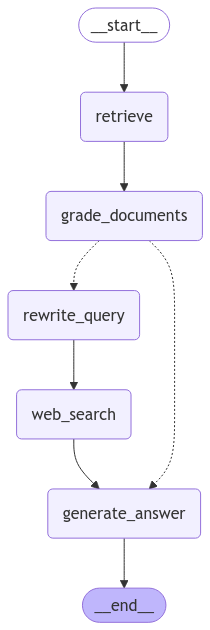

In [ ]:
# Fig 17
from IPython.display import Image, display, Markdown
display(Image(workflow_agent_rag.get_graph().draw_mermaid_png()))

In [ ]:
# Ejecutar el flujo con una pregunta de prueba
query = "What are some considerations for dress selection for work?"
initial_state = GraphState(question=query)
result = workflow_agent_rag.invoke(initial_state)

# Imprimir el resultado final
print("Respuesta final generada:")
print(result["generation"])


Buscando en la base de datos vectorial...
Evaluando relevancia de documentos...
Generando respuesta...
Respuesta final generada:
When selecting a dress for work, several considerations should be taken into account according to the provided context:

1. **Professionalism and Decorum**: Choose attire that reflects professionalism, maintaining honor and dignity.
2. **Cleanliness**: Always ensure that the attire is neat and clean.
3. **Objective Criteria**: Selection should be based on multiple objective criteria, ensuring the attire is appropriate for the work environment.
4. **Respectfulness**: Wear clothing that does not offend colleagues or clients.
5. **Client Interaction**: For those working with client companies, adhere to the dress code of the respective client.
6. **Dress Standards**: Maintain a neat and simple business casual attire, with options like jeans and sneakers being acceptable. Accessories should be kept minimal, with belts and socks that match the clothing color recomm

In [ ]:
# Ejecutar el flujo con una pregunta de prueba
query = "Tell me what is the capital of the country where BTS is located?"
initial_state = GraphState(question=query)
result = workflow_agent_rag.invoke(initial_state)

# Imprimir el resultado final
print("Respuesta final generada:")
print(result["generation"])

Buscando en la base de datos vectorial...
Evaluando relevancia de documentos...
Reescribiendo pregunta para web search...
Realizando búsqueda en la web...
Generando respuesta...
Respuesta final generada:
The capital city of South Korea is Seoul.


In [ ]:
# Ejecutar el flujo con una pregunta de prueba
query = "Me puedes decir el lugar de nacimiento del jugador de Futbol Chileno Alexis Sanchez?"
initial_state = GraphState(question=query)
result = workflow_agent_rag.invoke(initial_state)

# Imprimir el resultado final
print("Respuesta final generada:")
print(result["generation"])

Buscando en la base de datos vectorial...
Evaluando relevancia de documentos...
Reescribiendo pregunta para web search...
Realizando búsqueda en la web...
Generando respuesta...
Respuesta final generada:
Alexis Sanchez was born in Tocopilla, Chile.
